## Using the `Spp` class to simulate mutant strains

In the present notebook, we show a model with two virus variants can be simulated using the `pyross.stochastic.Spp` class. 

In [1]:
%matplotlib inline
import numpy as np
import pyross
import matplotlib.pyplot as plt
#from matplotlib import rc; rc('text', usetex=True)

### The SIR model

Below you will find the model-specification dictionary for the SIR model with that distingueishes infetions with type A and type B variants of a virus

In [2]:
model_spec = {
    "classes" : ["S", "IA", "IB"],

    "S" : {
        "infection" : [ ["IA", "-beta_A"],
                        ["IB", "-beta_B"]]
    },

    "IA" : {
        "linear"    : [ ["IA", "-gamma"],
                        ["IA", "-mutation_rate"]],
        "infection" : [ ["IA", "beta_A"] ]
    },
    
    "IB" : {
        "linear"    : [ ["IB", "-gamma"],
                        ["IA", "mutation_rate"]],
        "infection" : [ ["IB", "beta_B"] ]
    }
}



This corresponds to

$$
\begin{aligned}
\dot{S}_i & = - \beta_A \sum_j C_{ij} \frac{I^A_j}{N_j} S_i- \beta_B \sum_\nu C_{ij} \frac{I^B_j}{N_j} S_i \\
\dot{I}^A_i & = \beta_A \sum_j C_{ij} \frac{I^A_j}{N_j} S_i- \gamma I^A_i - mI^A_i \\
\dot{I}^B_i & = \beta_B \sum_j C_{ij} \frac{I^B_j}{N_j} S_i- \gamma I^B_i + mI^A_i  \\
\dot{R}_i & = \gamma I^A_i + \gamma I^B_i
\end{aligned}
$$

where we distinguish infections with the types A and B occuring at different infection rates $\beta_A$ and $\beta_B$. Mutations from A to B occur at a small rate $m$. As modeled by the linear term, mutations are more likely when many people are infected.

Next, we define the parameter values:

In [3]:
parameters = {
    'beta_A' : 0.1,
    'beta_B' : 0.2,
    'gamma' : 0.1, 
    'mutation_rate' : 0.0005
}

The initial conditions are defined as a numpy array. The numpy array must have dimensions $M \times (d-1)$, where $d$ is the number of model classes (so 3 for SIR, for example).

We start with infections of type A only.

In [4]:
M = 3                
Ni = 1000*np.ones(M)
N = np.sum(Ni) 


# Initial conditions as an array
x0 = np.array([
    995, 1000, 1000, # S
    5,   0,    0,    # IA
    0,   0,    0,    # IB
])


CM = np.array([
    [1,   0.5, 0.1],
    [0.5, 1,   0.5],
    [0.1, 0.5, 1  ]
], dtype=float)

def contactMatrix(t):  
    return CM

# duration of simulation and data file
Tf = 160;  Nf=Tf+1; 

model = pyross.stochastic.Spp(model_spec, parameters, M, Ni)
# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

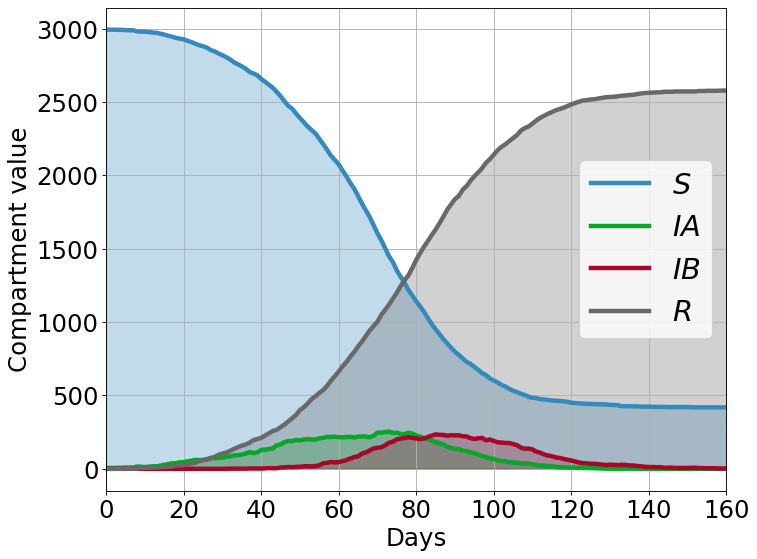

In [5]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
IA = np.sum(model.model_class_data('IA', data), axis=1)
IB = np.sum(model.model_class_data('IB', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, IA, color='#06A628', alpha=0.3)
plt.plot(t, IA, '-', color='#06A628', label='$IA$', lw=4)

plt.fill_between(t, 0, IB, color='#A60628', alpha=0.3)
plt.plot(t, IB, '-', color='#A60628', label='$IB$', lw=4)

plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');

We can use `pyross.stochastic.Spp.update_model_parameters` to change the parameters from what we set them initially:

In [6]:
parameters = {
    'beta_A' : 0.1,
    'beta_B' : 0.3,
    'gamma' : 0.1, 
    'mutation_rate' : 0.0005
}

model.update_model_parameters(parameters)

# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

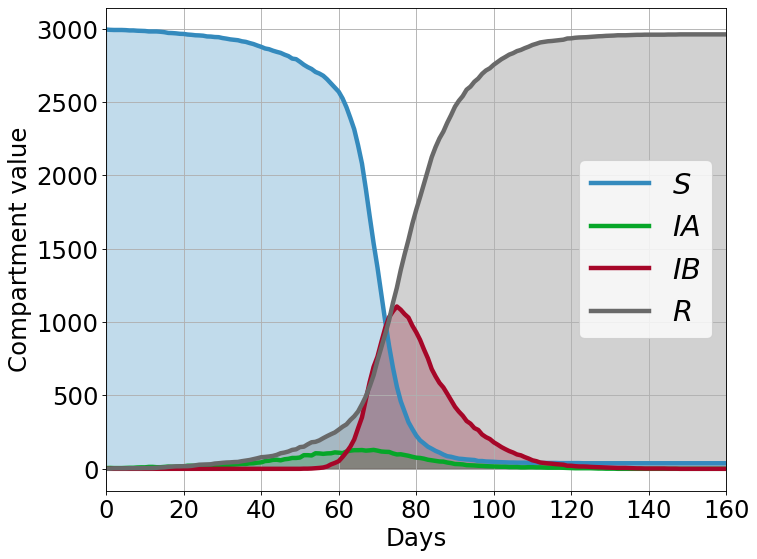

In [7]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
IA = np.sum(model.model_class_data('IA', data), axis=1)
IB = np.sum(model.model_class_data('IB', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, IA, color='#06A628', alpha=0.3)
plt.plot(t, IA, '-', color='#06A628', label='$IA$', lw=4)

plt.fill_between(t, 0, IB, color='#A60628', alpha=0.3)
plt.plot(t, IB, '-', color='#A60628', label='$IB$', lw=4)

plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');

So far, the mutant emerges at a random point in time. To have it emerge at a pre-defined time, we can use a time-dependent, sharply peaked mutation rate.

In [8]:
def parameter_mapping(input_parameters, t):
    output_parameters = {
        'beta_A' : input_parameters['beta_A'] ,
        'beta_B' : input_parameters['beta_B'] ,
        'gamma' : input_parameters['gamma'] 
    }
    if t>60 and t<61:
        output_parameters['mutation_rate'] = input_parameters['mutation_rate']
    else:
        output_parameters['mutation_rate'] = 0
    return output_parameters

In [9]:
parameters = {
    'beta_A' : 0.1,
    'beta_B' : 0.3,
    'gamma' : 0.1, 
    'mutation_rate' : 0.01
}

model = pyross.stochastic.Spp(model_spec, parameters, M, Ni, time_dep_param_mapping=parameter_mapping)
# simulate model 
data = model.simulate(x0, contactMatrix, Tf, Nf)

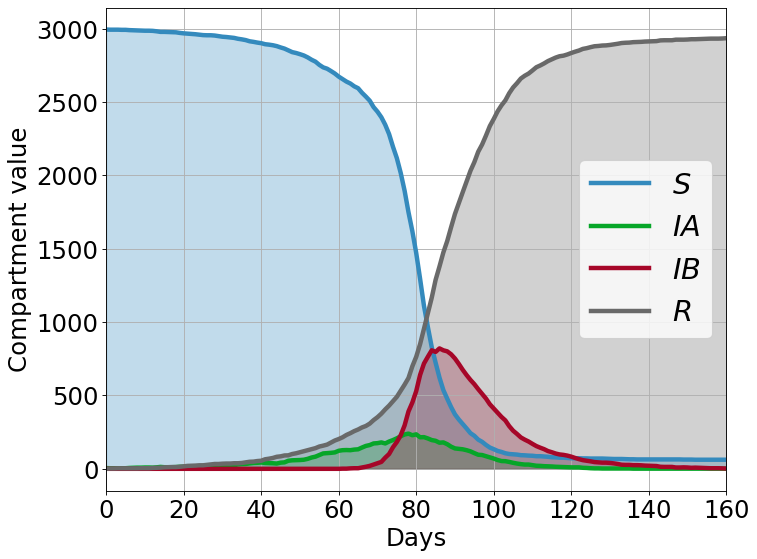

In [10]:
# plot the data and obtain the epidemic curve
S = np.sum(model.model_class_data('S', data), axis=1)
IA = np.sum(model.model_class_data('IA', data), axis=1)
IB = np.sum(model.model_class_data('IB', data), axis=1)
R = np.sum(model.model_class_data('R', data), axis=1)
t = data['t']

fig = plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 22})

plt.fill_between(t, 0, S, color="#348ABD", alpha=0.3)
plt.plot(t, S, '-', color="#348ABD", label='$S$', lw=4)

plt.fill_between(t, 0, IA, color='#06A628', alpha=0.3)
plt.plot(t, IA, '-', color='#06A628', label='$IA$', lw=4)

plt.fill_between(t, 0, IB, color='#A60628', alpha=0.3)
plt.plot(t, IB, '-', color='#A60628', label='$IB$', lw=4)

plt.fill_between(t, 0, R, color="dimgrey", alpha=0.3)
plt.plot(t, R, '-', color="dimgrey", label='$R$', lw=4)

plt.legend(fontsize=26); plt.grid() 
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylabel('Compartment value')
plt.xlabel('Days');